In [1]:
#import libraries
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.utils.np_utils import to_categorical
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
#get data and replace ? with NaN
data = pd.read_csv(r"heart.csv", na_values='?')
print('Shape of DataFrame:{}'.format(data.shape))

Shape of DataFrame:(303, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


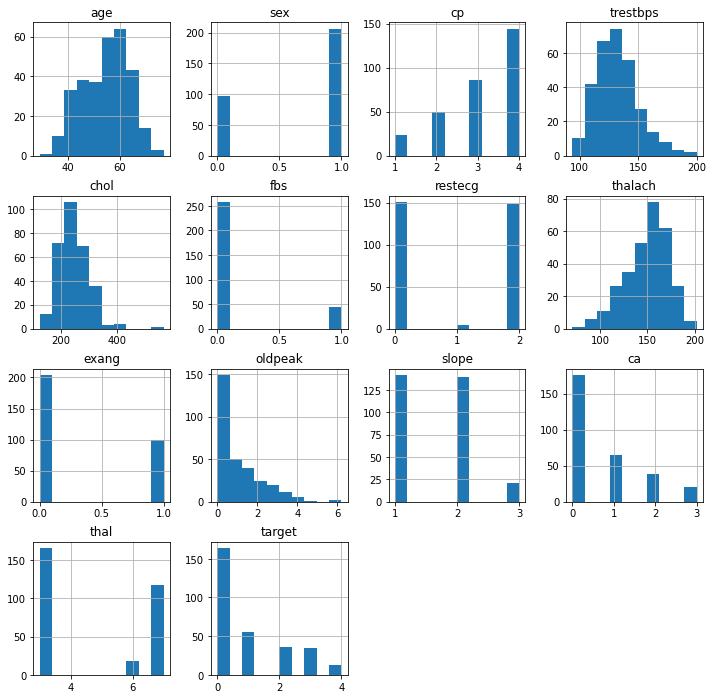

In [4]:
data.hist(figsize = (12, 12))
plt.show()

In [5]:
#drop rows with NaN values
print('data shape before dropping:{}'.format(data.shape))
data.dropna(inplace=True)
print('data shape after dropping:{}'.format(data.shape))

data shape before dropping:(303, 14)
data shape after dropping:(297, 14)


In [6]:
#isolate features and target
#generate more data using SMOTE
x1 = np.array(data.drop(['target'], 1))
y1 = np.array(data['target'])
oversample = SMOTE(sampling_strategy={0:500,1:400,2:350,3:300,4:250})
X, y = oversample.fit_resample(x1, y1)

C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (500) in class 0 will be larger than the number of samples in the majority class (class #0 -> 160)
  n_samples_majority,
C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (400) in class 1 will be larger than the number of samples in the majority class (class #0 -> 160)
  n_samples_majority,
C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (350) in class 2 will be larger than the number of samples in the majority class (class #0 -> 160)
  n_samples_majority,
C:\Users\User\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (300) in class 3 will be larger than the number of samples in the majority class (class #0 -> 160)
  n_sa

In [7]:
#split data into training, validation and testing
_, X_test, _, y_test = train_test_split(x1, y1, test_size=0.2, stratify=y1, shuffle = True, random_state = 100)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y,shuffle = True, random_state = 100)

In [8]:
#scale input and convert output to 0s and 1
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
Y_val = to_categorical(y_val, num_classes=None)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [9]:
#create keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(80, input_dim=X.shape[1], kernel_initializer='he_normal',  kernel_regularizer=regularizers.l2(0.001),
                    activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(40, kernel_initializer='he_normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(Y_train.shape[1], activation='softmax'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
Y_train_binary = Y_train.copy()
Y_test_binary = Y_test.copy()
Y_val_binary = Y_val.copy()
model = create_model()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.





In [10]:
# fit the model on the training data
history=model.fit(X_train, Y_train_binary, validation_data=(X_val, Y_val_binary), epochs=200, batch_size=16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1440 samples, validate on 360 samples
Epoch 1/200





1440/1440 [==============================] - 37s 26ms/step - loss: 1.9513 - acc: 0.3236 - val_loss: 1.3575 - val_acc: 0.5611
Epoch 2/200
1440/1440 [==============================] - 0s 337us/step - loss: 1.4738 - acc: 0.4785 - val_loss: 1.1994 - val_acc: 0.6250
Epoch 3/200
1440/1440 [==============================] - 0s 323us/step - loss: 1.3384 - acc: 0.5312 - val_loss: 1.1276 - val_acc: 0.6472
Epoch 4/200
1440/1440 [==============================] - 0s 342us/step - loss: 1.2319 - acc: 0.5861 - val_loss: 1.0331 - val_acc: 0.6889
Epoch 5/200
1440/1440 [==============================] - 0s 342us/step - loss: 1.1541 - acc: 0.6167 - val_loss: 0.9738 - val_acc: 0.7111
Epoch 6/200
1440/1440 [==============================] - 0s 328us/step - loss: 1.1123 - acc: 0.6271 - val_loss: 0.9346 - val_acc: 0.7444
Epoch 7/200
1440/1440 [======

Epoch 46/200
1440/1440 [==============================] - 0s 325us/step - loss: 0.5097 - acc: 0.8701 - val_loss: 0.4186 - val_acc: 0.9306
Epoch 47/200
1440/1440 [==============================] - 0s 340us/step - loss: 0.4718 - acc: 0.8917 - val_loss: 0.3987 - val_acc: 0.9444
Epoch 48/200
1440/1440 [==============================] - 0s 327us/step - loss: 0.4792 - acc: 0.8861 - val_loss: 0.3947 - val_acc: 0.9417
Epoch 49/200
1440/1440 [==============================] - 0s 316us/step - loss: 0.4912 - acc: 0.8771 - val_loss: 0.4014 - val_acc: 0.9361
Epoch 50/200
1440/1440 [==============================] - 0s 322us/step - loss: 0.4766 - acc: 0.8792 - val_loss: 0.3991 - val_acc: 0.9278
Epoch 51/200
1440/1440 [==============================] - 0s 321us/step - loss: 0.4738 - acc: 0.8819 - val_loss: 0.3865 - val_acc: 0.9444
Epoch 52/200
1440/1440 [==============================] - 0s 326us/step - loss: 0.4639 - acc: 0.8875 - val_loss: 0.3814 - val_acc: 0.9472
Epoch 53/200
1440/1440 [==========

Epoch 105/200
1440/1440 [==============================] - 1s 349us/step - loss: 0.3223 - acc: 0.9354 - val_loss: 0.2684 - val_acc: 0.9611
Epoch 106/200
1440/1440 [==============================] - 0s 339us/step - loss: 0.3250 - acc: 0.9333 - val_loss: 0.2672 - val_acc: 0.9694
Epoch 107/200
1440/1440 [==============================] - 0s 328us/step - loss: 0.3060 - acc: 0.9437 - val_loss: 0.2651 - val_acc: 0.9667
Epoch 108/200
1440/1440 [==============================] - 0s 339us/step - loss: 0.3216 - acc: 0.9285 - val_loss: 0.2689 - val_acc: 0.9611
Epoch 109/200
1440/1440 [==============================] - 0s 328us/step - loss: 0.3116 - acc: 0.9368 - val_loss: 0.2710 - val_acc: 0.9611
Epoch 110/200
1440/1440 [==============================] - 0s 333us/step - loss: 0.3130 - acc: 0.9410 - val_loss: 0.2551 - val_acc: 0.9694
Epoch 111/200
1440/1440 [==============================] - 0s 328us/step - loss: 0.3064 - acc: 0.9382 - val_loss: 0.2573 - val_acc: 0.9639
Epoch 112/200
1440/1440 [==

Epoch 164/200
1440/1440 [==============================] - 0s 322us/step - loss: 0.2179 - acc: 0.9639 - val_loss: 0.2022 - val_acc: 0.9778
Epoch 165/200
1440/1440 [==============================] - 0s 322us/step - loss: 0.2304 - acc: 0.9590 - val_loss: 0.1957 - val_acc: 0.9778
Epoch 166/200
1440/1440 [==============================] - 0s 317us/step - loss: 0.2401 - acc: 0.9576 - val_loss: 0.2024 - val_acc: 0.9778
Epoch 167/200
1440/1440 [==============================] - 0s 322us/step - loss: 0.2322 - acc: 0.9556 - val_loss: 0.1968 - val_acc: 0.9806
Epoch 168/200
1440/1440 [==============================] - 0s 317us/step - loss: 0.2312 - acc: 0.9556 - val_loss: 0.2107 - val_acc: 0.9722
Epoch 169/200
1440/1440 [==============================] - 0s 328us/step - loss: 0.2338 - acc: 0.9583 - val_loss: 0.2023 - val_acc: 0.9722
Epoch 170/200
1440/1440 [==============================] - 0s 322us/step - loss: 0.2205 - acc: 0.9639 - val_loss: 0.2158 - val_acc: 0.9694
Epoch 171/200
1440/1440 [==

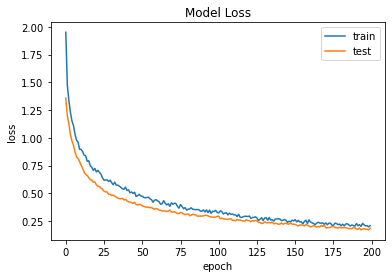

In [11]:
# Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

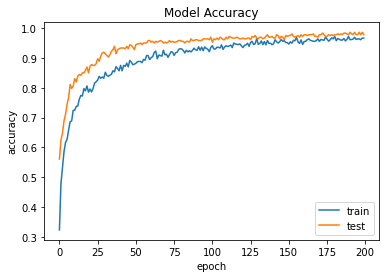

In [12]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, classification_report
# generate classification report using predictions for model
y_pred = model.predict_classes(X_test)
print('Results for Model')
print(accuracy_score(y_test, y_pred))
print('classification report')
print(classification_report(y_test, y_pred))

Results for Model
0.95
classification report
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.83      0.91      0.87        11
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         3

    accuracy                           0.95        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.95      0.95      0.95        60



In [14]:
print(y_test)
print('-----------------')
print(y_pred)

[1 1 0 2 1 0 0 3 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 2 4 1 2 0 4 3 3 0 4 3 2 1
 0 0 2 1 0 0 1 1 0 3 0 0 0 0 3 2 0 0 1 0 0 0 3]
-----------------
[1 1 0 2 1 0 0 3 0 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 2 4 1 2 1 4 3 3 0 4 3 2 1
 1 0 2 0 0 0 1 1 0 3 0 0 0 0 3 2 0 0 1 0 0 0 3]


Class=0, n=160 (8.889%)
Class=2, n=35 (1.944%)
Class=1, n=54 (3.000%)
Class=3, n=35 (1.944%)
Class=4, n=13 (0.722%)


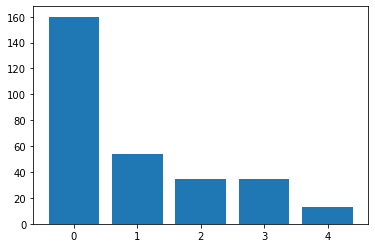

In [15]:
# samples num in each class before SMOTE
from collections import Counter
from matplotlib import pyplot
counter = Counter(y1)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=500 (27.778%)
Class=2, n=350 (19.444%)
Class=1, n=400 (22.222%)
Class=3, n=300 (16.667%)
Class=4, n=250 (13.889%)


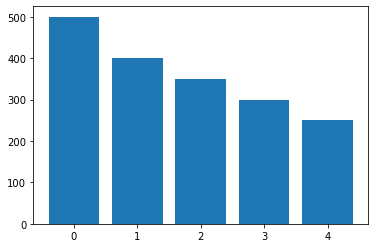

In [16]:
# samples num in each class after applying SMOTE
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from keras.models import load_model
model.save('heartD_model.h5')

In [ ]:
from pickle import dump
dump(scaler,open('scaler.pkl','wb'))

In [ ]:
from keras.models import load_model
from pickle import load
import numpy as np
model = load_model('heartD_model.h5')
scaler = load(open('scaler.pkl','rb'))
X_n1 = scaler.transform(np.array([['37', '1', '3', '130', '250', '0' ,'0', '187', '0', '3.5', '3', '0', '3']]))
y_p = model.predict_classes(X_n1)
print(y_p)